# Dynophore notebook

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path

from dynophores import Dynophore
from dynophores import plot, view3d

In [3]:
dyno_path = Path("../../dynophores/tests/data/1KE7-1/DynophoreApp")
pdb_path = Path("../../dynophores/tests/data/1KE7-1/startframe.pdb")
dcd_path = Path("../../dynophores/tests/data/1KE7-1/trajectory.dcd")

## 3D view

In [5]:
pml_path = dyno_path / "dynophore.pml"
view = view3d.show_dynophore3d(pml_path, pdb_path, dcd_path)
view.display(gui=True, style="ngl")

NGLWidget(gui_style='ngl', max_frame=100)

In [6]:
view.render_image(trim=True, factor=2, transparent=True);

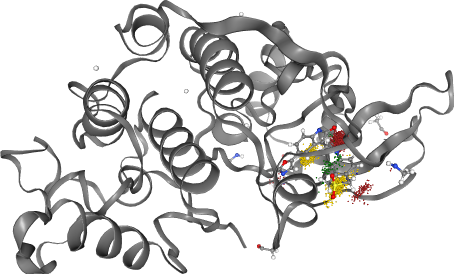

In [7]:
view._display_image()

## Statistics

### Load data as `Dynophore` object

In [8]:
dynophore = Dynophore.from_files(dyno_path)

Read files from ../../dynophores/tests/data/1KE7-1/DynophoreApp/data.


### Plot interactions overview (heatmap)

In [9]:
plot.interactive.superfeatures_vs_envpartners(dynophore);

interactive(children=(SelectMultiple(description='Superfeature name(s):', index=(0,), options=('all', 'H[4599,…

### Plot superfeature occurrences (time series)

In [10]:
plot.interactive.superfeatures_occurrences(dynophore);

interactive(children=(SelectMultiple(description='Superfeature name(s):', index=(0,), options=('all', 'H[4599,…

### Plot interactions for example superfeature (time series)

#### Interaction occurrence

In [11]:
plot.interactive.envpartners_occurrences(dynophore);

interactive(children=(SelectMultiple(description='Superfeature name(s):', index=(0,), options=('H[4599,4602,46…

#### Interaction distances

In [12]:
plot.interactive.envpartners_distances(dynophore);

interactive(children=(SelectMultiple(description='Superfeature name(s):', index=(0,), options=('H[4599,4602,46…

#### Interaction profile (all-in-one)

In [13]:
plot.interactive.envpartners_all_in_one(dynophore);

interactive(children=(Select(description='Superfeature name(s):', options=('H[4599,4602,4601,4608,4609,4600]',…